In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = "HotelData/master_hotel_data.csv"
fattab = "HotelData/hotel_prices_FAT_table_clean.csv"
distance_file = "HotelData/distance_clean.csv"
rating_file = "HotelData/ratings_clean.csv"
entertainment_apicall = "HotelData/entertainment.csv"
hotel_apicall = "HotelData/hotels.csv"
transportation_apicall = "HotelData/transport.csv"
new_all_hotels = "HotelData/all_hotels_data.csv"

all_data = pd.read_csv(file)
new_all_data = pd.read_csv(new_all_hotels)
FAT_TAB = pd.read_csv(fattab)
distance = pd.read_csv(distance_file)
rating = pd.read_csv(rating_file)

entertainment_data = pd.read_csv(entertainment_apicall)
transportation_data = pd.read_csv(transportation_apicall)
hotel_api = pd.read_csv(hotel_apicall)

In [3]:
# all_data

In [4]:
# entertainment_data

In [5]:
# transportation_data

In [6]:
# hotel_api

In [7]:
# rating

In [8]:
# distance

In [9]:
rating_merge = rating.copy()
distance_merge = distance.copy()

In [10]:
# rating_merge

In [11]:
distance_rating = pd.merge(distance_merge, rating_merge, how = 'inner', on = 'Hotel Name')
distance_rating

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews
0,31 Street Broadway Hotel,0.00,5.2,603
1,Americana Motel,17.44,4.6,115
2,Days Inn by Wyndham Wayne,21.44,6.4,1002
3,Quality Inn Wayne - Fairfield Area,17.75,5.0,468
4,Americas Best Value Inn Avenel Woodbridge,17.36,6.2,290
...,...,...,...,...
751,Royal Park,0.00,5.8,801
752,AKA Wall Street,0.00,9.4,400
753,New World Hotel,0.00,3.6,984
754,Nyma The New York Manhattan Hotel,0.00,7.2,1000


In [12]:
distance_rating.dtypes

Hotel Name            object
Distance from NYC    float64
Hotel Rating         float64
Number of Reviews      int64
dtype: object

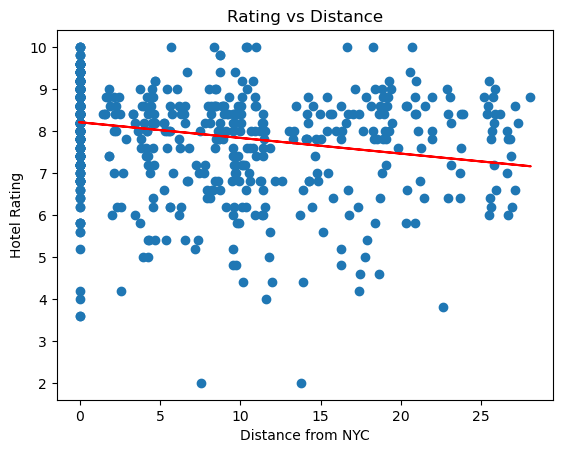

-0.24288855025352393


In [13]:
x_values = distance_rating["Distance from NYC"]
y_values = distance_rating["Hotel Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.8),fontsize=15,color="red")
plt.ylabel("Hotel Rating")
plt.xlabel("Distance from NYC")
plt.title("Rating vs Distance")
plt.show()
print(rvalue)

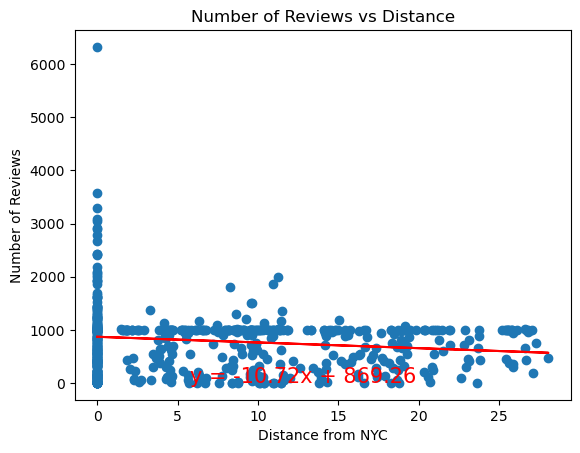

-0.15720003039469796


In [14]:
x_values = distance_rating["Distance from NYC"]
y_values = distance_rating["Number of Reviews"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Number of Reviews")
plt.xlabel("Distance from NYC")
plt.title("Number of Reviews vs Distance")
plt.show()
print(rvalue)

In [15]:
# rating_merge

In [16]:
FAT_TAB.dtypes

Check-In Date           object
Check-Out Date          object
Hotel Name              object
Advertised Price        object
Total Price             object
Advertised Price ($)    object
Total Price ($)         object
dtype: object

In [17]:
FT_copy = FAT_TAB.copy()

In [18]:
# df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
FT_copy[['Advertised Price ($)', 'Total Price ($)']] = FT_copy[['Advertised Price ($)', 'Total Price ($)']].replace('[\$,]', '', regex=True).astype(float)
# FT_copy

In [19]:
FT_copy.dtypes

Check-In Date            object
Check-Out Date           object
Hotel Name               object
Advertised Price         object
Total Price              object
Advertised Price ($)    float64
Total Price ($)         float64
dtype: object

In [20]:
avgprice = FT_copy.groupby(["Hotel Name"]).mean()["Advertised Price ($)"]

/var/folders/p1/75d6qxbd65v17kwgc_pn1k7w0000gn/T/ipykernel_31127/3910543987.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgprice = FT_copy.groupby(["Hotel Name"]).mean()["Advertised Price ($)"]


In [21]:
avg_price = pd.DataFrame(avgprice)
avg_price

,Advertised Price ($)
Hotel Name,
*New* 2 BR+patio+workspace+parking near Seton Hall,175.000000
00 Cozy apt and easy transportation to New York City,215.000000
1 Hotel Brooklyn Bridge,640.576923
1 Hotel Central Park,586.541667
11 Howard,433.313725
...,...
⭐️ Best Apt To Visit NYC-5 minutes to✈️EWR airport+Free Parking,125.000000
⭐️ Best Studio/RV To Visit NYC✈️EWR Airport-Free Parking,84.714286
⭐️Spacious LOFT W/King BD + Free Parking Near EWR✈️ NYC🗽❤️ & 🇺🇸 DREAM Mall ⭐️,195.000000


In [22]:
avgTprice = FT_copy.groupby(["Hotel Name"]).mean()["Total Price ($)"]
avg_tot_price = pd.DataFrame(avgTprice)
avg_tot_price

/var/folders/p1/75d6qxbd65v17kwgc_pn1k7w0000gn/T/ipykernel_31127/3303652994.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgTprice = FT_copy.groupby(["Hotel Name"]).mean()["Total Price ($)"]


,Total Price ($)
Hotel Name,
*New* 2 BR+patio+workspace+parking near Seton Hall,410.000000
00 Cozy apt and easy transportation to New York City,345.000000
1 Hotel Brooklyn Bridge,672.538462
1 Hotel Central Park,575.083333
11 Howard,540.941176
...,...
⭐️ Best Apt To Visit NYC-5 minutes to✈️EWR airport+Free Parking,352.000000
⭐️ Best Studio/RV To Visit NYC✈️EWR Airport-Free Parking,257.571429
⭐️Spacious LOFT W/King BD + Free Parking Near EWR✈️ NYC🗽❤️ & 🇺🇸 DREAM Mall ⭐️,362.000000


In [23]:
price_regression = distance_rating.copy()
price_regression

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews
0,31 Street Broadway Hotel,0.00,5.2,603
1,Americana Motel,17.44,4.6,115
2,Days Inn by Wyndham Wayne,21.44,6.4,1002
3,Quality Inn Wayne - Fairfield Area,17.75,5.0,468
4,Americas Best Value Inn Avenel Woodbridge,17.36,6.2,290
...,...,...,...,...
751,Royal Park,0.00,5.8,801
752,AKA Wall Street,0.00,9.4,400
753,New World Hotel,0.00,3.6,984
754,Nyma The New York Manhattan Hotel,0.00,7.2,1000


In [24]:
price_regression_df = pd.merge(price_regression, avg_price, how = 'inner', on = 'Hotel Name')
price_regression_df

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews,Advertised Price ($)
0,31 Street Broadway Hotel,0.00,5.2,603,111.800000
1,Americana Motel,17.44,4.6,115,70.000000
2,Days Inn by Wyndham Wayne,21.44,6.4,1002,81.196078
3,Quality Inn Wayne - Fairfield Area,17.75,5.0,468,101.916667
4,Americas Best Value Inn Avenel Woodbridge,17.36,6.2,290,99.000000
...,...,...,...,...,...
751,Royal Park,0.00,5.8,801,NaN
752,AKA Wall Street,0.00,9.4,400,NaN
753,New World Hotel,0.00,3.6,984,NaN
754,Nyma The New York Manhattan Hotel,0.00,7.2,1000,NaN


In [25]:
full_price_rating = pd.merge(price_regression_df, avg_tot_price, how = 'inner', on = 'Hotel Name')
full_price_rating

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews,Advertised Price ($),Total Price ($)
0,31 Street Broadway Hotel,0.00,5.2,603,111.800000,357.700000
1,Americana Motel,17.44,4.6,115,70.000000,80.000000
2,Days Inn by Wyndham Wayne,21.44,6.4,1002,81.196078,93.039216
3,Quality Inn Wayne - Fairfield Area,17.75,5.0,468,101.916667,116.722222
4,Americas Best Value Inn Avenel Woodbridge,17.36,6.2,290,99.000000,113.000000
...,...,...,...,...,...,...
751,Royal Park,0.00,5.8,801,NaN,NaN
752,AKA Wall Street,0.00,9.4,400,NaN,NaN
753,New World Hotel,0.00,3.6,984,NaN,NaN
754,Nyma The New York Manhattan Hotel,0.00,7.2,1000,NaN,NaN


In [26]:
full_price_rating_copy = full_price_rating.copy()

In [27]:
full_price_rating_copy = full_price_rating_copy.dropna()
full_price_rating_copy

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews,Advertised Price ($),Total Price ($)
0,31 Street Broadway Hotel,0.00,5.2,603,111.800000,357.700000
1,Americana Motel,17.44,4.6,115,70.000000,80.000000
2,Days Inn by Wyndham Wayne,21.44,6.4,1002,81.196078,93.039216
3,Quality Inn Wayne - Fairfield Area,17.75,5.0,468,101.916667,116.722222
4,Americas Best Value Inn Avenel Woodbridge,17.36,6.2,290,99.000000,113.000000
...,...,...,...,...,...,...
737,Conrad New York Downtown,0.00,9.4,999,507.173913,587.304348
738,Chelsea Hotel Room King Bed,0.00,9.8,10,9.380000,10.220000
739,Bowery Grand Hotel,0.00,4.2,994,93.857143,111.357143
742,Canal Loft Hotel,0.00,7.2,665,153.129032,220.677419


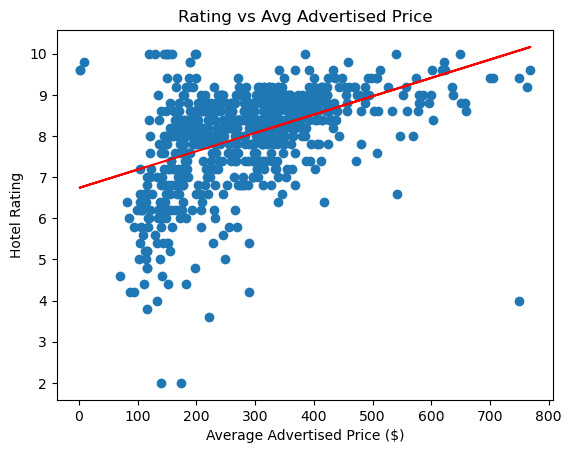

0.45954490040855367


In [28]:
x_values = full_price_rating_copy["Advertised Price ($)"]
y_values = full_price_rating_copy["Hotel Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Hotel Rating")
plt.xlabel("Average Advertised Price ($)")
plt.title("Rating vs Avg Advertised Price")
plt.show()
print(rvalue)

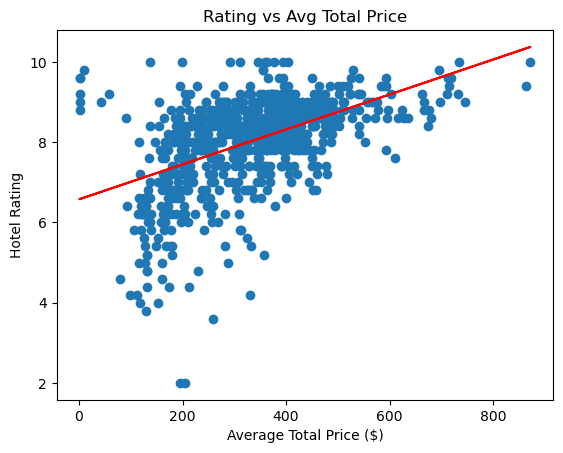

0.4952732516978674


In [29]:
x_values = full_price_rating_copy["Total Price ($)"]
y_values = full_price_rating_copy["Hotel Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Hotel Rating")
plt.xlabel("Average Total Price ($)")
plt.title("Rating vs Avg Total Price")
plt.show()
print(rvalue)

In [61]:
# hotel_api

In [60]:
# hotel_api.info()

In [59]:
# entertainment_data

In [58]:
# transportation_data

In [57]:
# all_data.info()

In [35]:
transportation_data['postcode'].nunique()

38

In [36]:
entertainment_data['postcode'].nunique()

51

In [37]:
hotel_api['postcode'].nunique()

52

In [38]:
hotel_zipgroup = hotel_api.groupby(['postcode']).count()['hotel']
hotel_zipgroup

postcode
7030      4
7032      1
7047      2
7086      2
7087      1
7302      4
7306      2
7307      2
7310      4
7311      1
10001    43
10002    19
10003     9
10004     4
10005    10
10006     6
10007     1
10010     9
10011    15
10012     7
10013    18
10014     7
10016    33
10017    23
10018    47
10019    42
10021     1
10022    20
10023     4
10035     3
10036    48
10037     3
10038    10
10044     1
10062     1
10065     3
10280     1
10282     1
11101    20
11201     9
11205     1
11206     5
11211     3
11215     4
11216     4
11217     6
11220     1
11222     4
11231     2
11232    11
11238     1
11249     4
Name: hotel, dtype: int64

In [42]:
transort_zipgroup = transportation_data.groupby(['postcode']).count()['tranportation']
transport_zipgroup = pd.DataFrame(transort_zipgroup)
# transport_zipgroup

In [43]:
enter_zipgroup = entertainment_data.groupby(['postcode']).count()['entertainment']
entertainment_zipgroup = pd.DataFrame(enter_zipgroup)
# entertainment_zipgroup

In [41]:
hotel_api_copy = hotel_api.copy()

In [45]:
zip_merge = pd.merge(hotel_api_copy, entertainment_zipgroup, how = 'left', on = 'postcode')
zip_merge

,hotel,city,postcode,housenumber,street,state,address1,address2,entertainment
0,"The Beekman, A Thompson Hotel",New York,10038,123,Nassau Street,New York,"The Beekman, A Thompson Hotel","123 Nassau Street, New York, NY 10038, United ...",3.0
1,Aloft Manhattan Downtown,New York,10038,49,Ann Street,New York,Aloft Manhattan Downtown,"49 Ann Street, New York, NY 10038, United Stat...",3.0
2,Duane Street Hotel,New York,10013,182,Duane Street,New York,Duane Street Hotel,"182 Duane Street, New York, NY 10013, United S...",18.0
3,Millenium Hilton,New York,10013,55,Church Street,New York,Millenium Hilton,"55 Church Street, New York, NY 10013, United S...",18.0
4,The Frederick Hotel,New York,10007,NaN,Chambers Street,New York,The Frederick Hotel,"Chambers Street, New York, NY 10007, United St...",1.0
...,...,...,...,...,...,...,...,...,...
495,Hilton Garden Inn,New York,11101,29-21,41st Avenue,New York,Hilton Garden Inn,"29-21 41st Avenue, New York, NY 11101, United ...",6.0
496,NaN,New York,11101,40-30,Crescent Street,New York,40-30 Crescent Street,"New York, NY 11101, United States of America",6.0
497,Wingate by Wyndham Long Island City,New York,11101,NaN,12th Street,New York,Wingate by Wyndham Long Island City,"12th Street, New York, NY 11101, United States...",6.0
498,Country Inn & Suites by Carlson,New York,11101,40-34,Crescent Street,New York,Country Inn & Suites by Carlson,"40-34 Crescent Street, New York, NY 11101, Uni...",6.0


In [46]:
zip_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hotel          487 non-null    object 
 1   city           500 non-null    object 
 2   postcode       500 non-null    int64  
 3   housenumber    453 non-null    object 
 4   street         500 non-null    object 
 5   state          500 non-null    object 
 6   address1       500 non-null    object 
 7   address2       500 non-null    object 
 8   entertainment  465 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 39.1+ KB


In [47]:
zip_merged = pd.merge(zip_merge, transport_zipgroup, how = 'inner', on = 'postcode')
zip_merged

,hotel,city,postcode,housenumber,street,state,address1,address2,entertainment,tranportation
0,"The Beekman, A Thompson Hotel",New York,10038,123,Nassau Street,New York,"The Beekman, A Thompson Hotel","123 Nassau Street, New York, NY 10038, United ...",3.0,18
1,Aloft Manhattan Downtown,New York,10038,49,Ann Street,New York,Aloft Manhattan Downtown,"49 Ann Street, New York, NY 10038, United Stat...",3.0,18
2,Holiday Inn,New York,10038,51,Nassau Street,New York,Holiday Inn,"51 Nassau Street, New York, NY 10038, United S...",3.0,18
3,Hampton Inn Manhattan-Seaport-Financial District,New York,10038,320,Pearl Street,New York,Hampton Inn Manhattan-Seaport-Financial District,"320 Pearl Street, New York, NY 10038, United S...",3.0,18
4,Four Points by Sheraton,New York,10038,6,Platt Street,New York,Four Points by Sheraton,"6 Platt Street, New York, NY 10038, United Sta...",3.0,18
...,...,...,...,...,...,...,...,...,...,...
267,JW Marriott Essex House,New York,10019,160,Central Park South,New York,JW Marriott Essex House,"160 Central Park South, New York, NY 10019, Un...",23.0,10
268,6 Columbus,New York,10019,308,West 58th Street,New York,6 Columbus,"308 West 58th Street, New York, NY 10019, Unit...",23.0,10
269,Fairfield Inn & Suites by Marriott New York Ma...,New York,10019,534,West 58th Street,New York,Fairfield Inn & Suites by Marriott New York Ma...,"534 West 58th Street, New York, NY 10019, Unit...",23.0,10
270,Haiban Inn,Jersey City,7306,789,Newark Avenue,New Jersey,Haiban Inn,"789 Newark Avenue, Jersey City, NJ 07306, Unit...",1.0,2


In [56]:
entertainment_count = zip_merged.groupby(['hotel']).sum()['entertainment']
count_entertainment = pd.DataFrame(entertainment_count)
count_entertainment.head(15)

/var/folders/p1/75d6qxbd65v17kwgc_pn1k7w0000gn/T/ipykernel_31127/3363878032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  entertainment_count = zip_merged.groupby(['hotel']).sum()['entertainment']


,entertainment
hotel,
1 Hotel Brooklyn Bridge,19.0
1 Hotel Central Park,23.0
33 Seaport Hotel,3.0
35 Hudson Yards,11.0
49 Crosby,30.0
6 Columbus,23.0
78-80 Mulberry Street,30.0
AC Hotel NYC Downtown,3.0
AKA Central Park,23.0


In [54]:
transportation_count = zip_merged.groupby(['hotel']).sum()['tranportation']
count_transportation = pd.DataFrame(transportation_count)
count_transportation

/var/folders/p1/75d6qxbd65v17kwgc_pn1k7w0000gn/T/ipykernel_31127/3401519995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transportation_count = zip_merged.groupby(['hotel']).sum()['tranportation']


,tranportation
hotel,
1 Hotel Brooklyn Bridge,35
1 Hotel Central Park,10
33 Seaport Hotel,18
35 Hudson Yards,3
49 Crosby,20
...,...
Zephyr Lofts,3
citizenM,10
citizenM New York Bowery,62


In [53]:
et = pd.merge(count_entertainment, count_transportation, how = 'inner', on = 'hotel')
et

,entertainment,tranportation
hotel,,
1 Hotel Brooklyn Bridge,19.0,35
1 Hotel Central Park,23.0,10
33 Seaport Hotel,3.0,18
35 Hudson Yards,11.0,3
49 Crosby,30.0,20
...,...,...
Zephyr Lofts,7.0,3
citizenM,23.0,10
citizenM New York Bowery,44.0,62


In [67]:
et.index.names = ['Hotel Name']
et

,entertainment,tranportation
Hotel Name,,
1 Hotel Brooklyn Bridge,19.0,35
1 Hotel Central Park,23.0,10
33 Seaport Hotel,3.0,18
35 Hudson Yards,11.0,3
49 Crosby,30.0,20
...,...,...
Zephyr Lofts,7.0,3
citizenM,23.0,10
citizenM New York Bowery,44.0,62


In [73]:
et_price = pd.merge(full_price_rating_copy, et, how = 'inner', on = 'Hotel Name')
et_price

,Hotel Name,Distance from NYC,Hotel Rating,Number of Reviews,Advertised Price ($),Total Price ($),entertainment,tranportation
0,Haiban Inn,3.45,6.0,292,117.692308,137.461538,1.0,2
1,The Baltic Hotel,2.35,6.2,223,208.466667,254.166667,33.0,4
2,DoubleTree by Hilton New York Downtown,0.00,7.4,1239,295.862745,342.921569,14.0,21
3,Hampton Inn Manhattan-Seaport-Financial District,0.00,8.2,1000,235.738095,274.047619,3.0,18
4,The Shelburne Sonesta New York,0.00,8.2,1009,291.411765,382.764706,9.0,1
5,Orchard Street Hotel,0.00,7.2,642,227.120000,278.840000,44.0,62
6,The Manhattan at Times Square Hotel,0.00,5.6,2916,244.730769,324.769231,23.0,10
7,The Holland Hotel,2.14,8.8,1001,237.971429,277.514286,1.0,7
8,The Lodge Red Hook,2.27,8.0,73,231.800000,269.342857,22.0,11
9,Midtown West Hotel,0.00,6.4,743,208.688889,258.155556,11.0,3


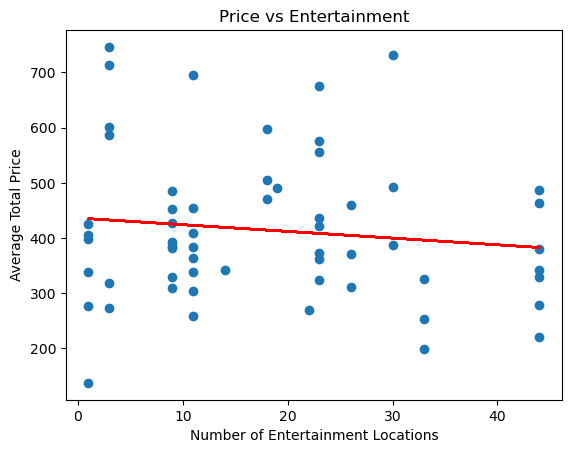

-0.12189445748949218


In [69]:
x_values = et_price["entertainment"]
y_values = et_price["Total Price ($)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Average Total Price")
plt.xlabel("Number of Entertainment Locations")
plt.title("Price vs Entertainment")
plt.show()
print(rvalue)

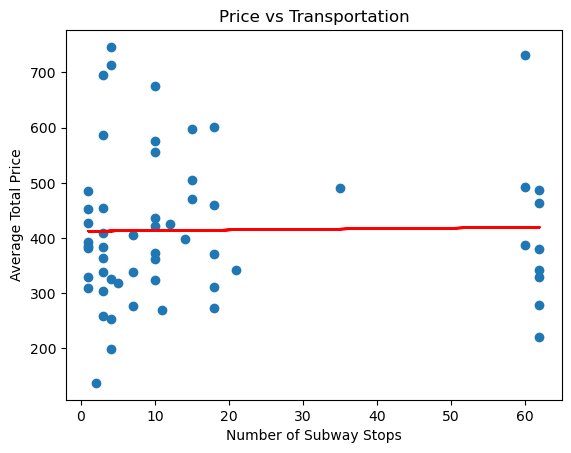

0.018258224609905435


In [71]:
x_values = et_price["tranportation"]
y_values = et_price["Total Price ($)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Average Total Price")
plt.xlabel("Number of Subway Stops")
plt.title("Price vs Transportation")
plt.show()
print(rvalue)